In [1]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# **Data Wrangling**

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
# drop blank columns

df.drop(['Status', 'unnamed1'], axis = 1, inplace= True)

In [7]:
# drop null values

df.dropna(inplace= True)

In [8]:
# change data type

df['Amount'] = df['Amount'].astype('int')

In [9]:
df['Amount'].dtype

dtype('int64')

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [11]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [12]:
df.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6583
dtype: int64

# **Male and Female Buyers**

In [13]:
# getting index and count values

x = df['Gender'].value_counts().index
y = df['Gender'].value_counts().values

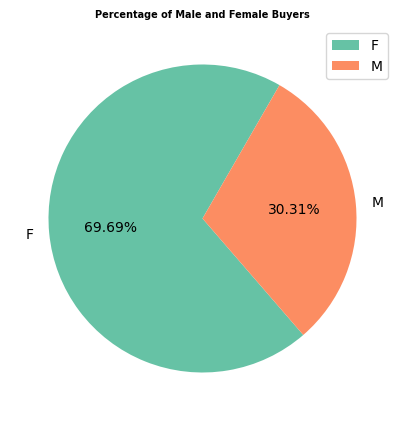

In [16]:
plt.figure(figsize=(9,5))
plt.pie(y, labels= x,startangle= 60, colors=plt.get_cmap('Set2').colors, autopct='%1.2f%%')

plt.title('Percentage of Male and Female Buyers', fontsize= 7, fontweight= 'bold')
plt.legend()
plt.show()

*As we can see in the above pie chart, the percentage of female buyers is higher than that of male buyers.*




# **Group of age as per gender**

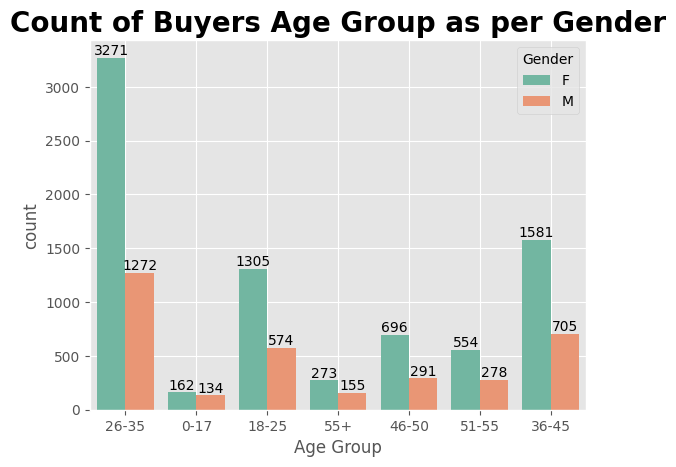

In [ ]:
style.use('ggplot')
ax = sns.countplot(x='Age Group', hue= 'Gender', palette='Set2', data = df)

for bars in ax.containers:
  ax.bar_label(bars)

plt.grid(True, color='w')
plt.title('Count of Buyers Age Group as per Gender', fontsize= 20, fontweight= 'bold')
plt.show()

# **Age**

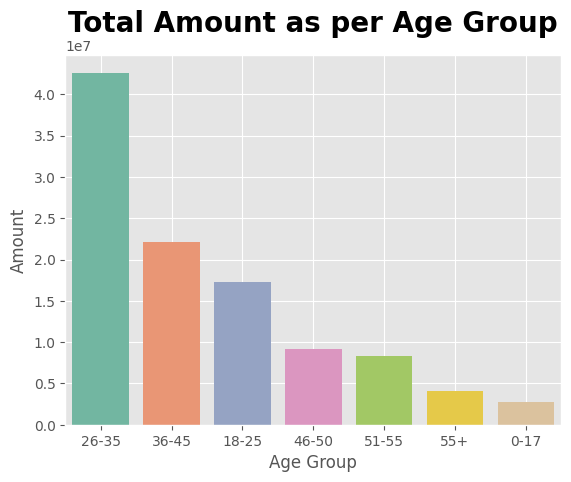

In [ ]:
sales_age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)

style.use('ggplot')
sns.barplot(x= 'Age Group', y= 'Amount', hue= 'Age Group', data= sales_age, palette='Set2')

plt.title('Total Amount as per Age Group', fontsize= 20, fontweight= 'bold')
plt.grid(True, color='w')
plt.show()

*As per the above countplot, the age group between 26-35 buyers is the highest.*

# **Top 10 states**

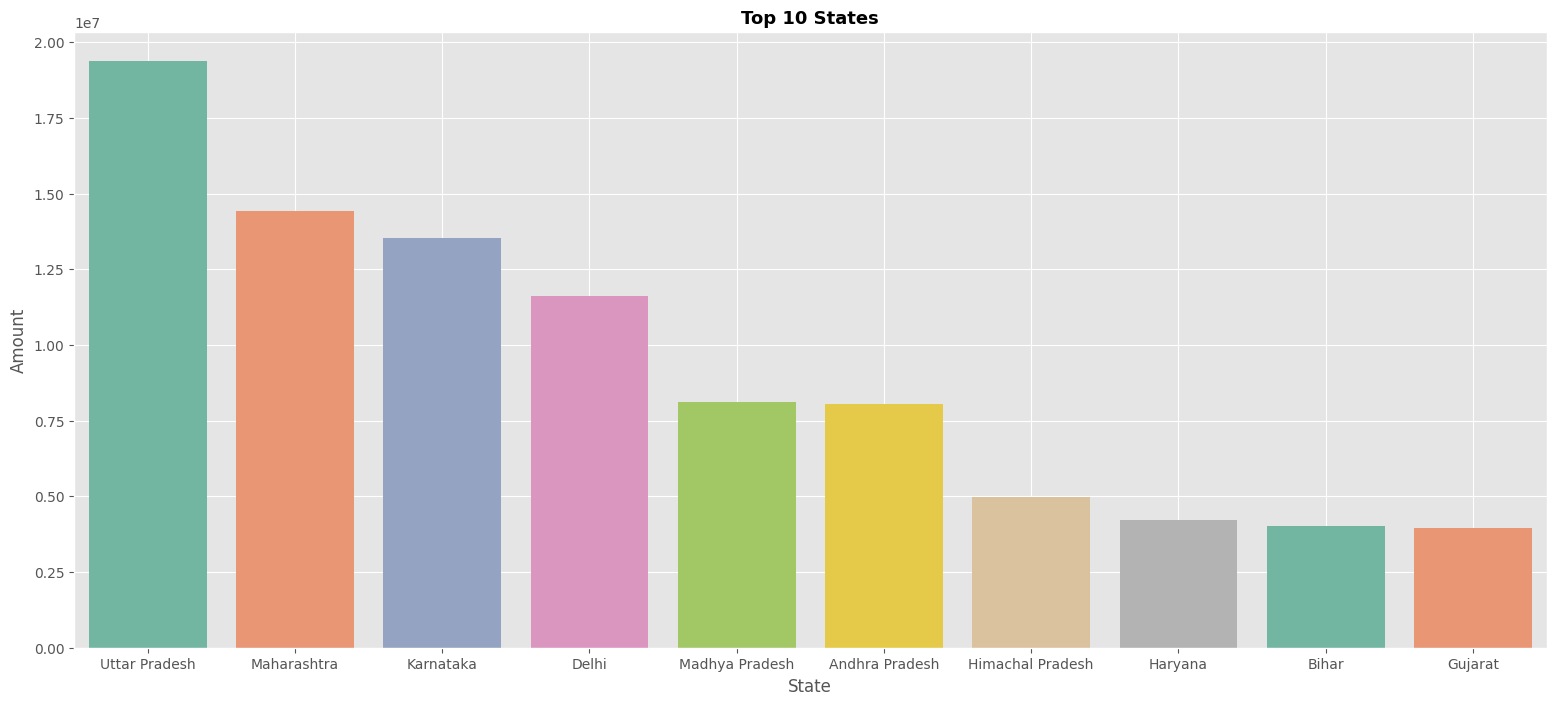

In [19]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

style.use('ggplot')
plt.figure(figsize=(19,8))
sns.barplot(x= 'State', y= 'Amount', hue= 'State', data = sales_state, palette= 'Set2')

plt.title('Top 10 States', fontsize=13, fontweight='bold')
plt.grid(True, color='w')
plt.show()

*From the above graphs, we can see that most of the orders and total sales are from Uttar Pradesh, Maharashtra, and Karnataka, as follows.*

**Marital Status**

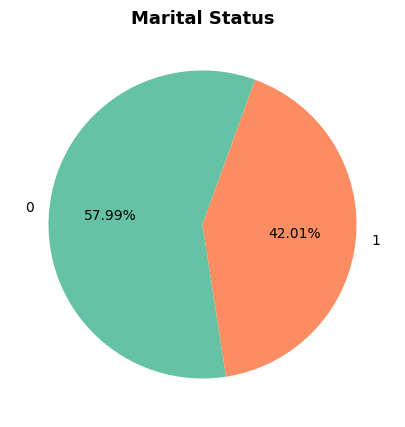

In [20]:
x= df['Marital_Status'].value_counts().values
y= df['Marital_Status'].value_counts().index

plt.figure(figsize=(9,5))
plt.pie(x,labels= y, autopct='%1.2f%%', colors=plt.get_cmap('Set2').colors, startangle= 70)

plt.title('Marital Status', fontsize= 13, fontweight= 'bold')
plt.show()


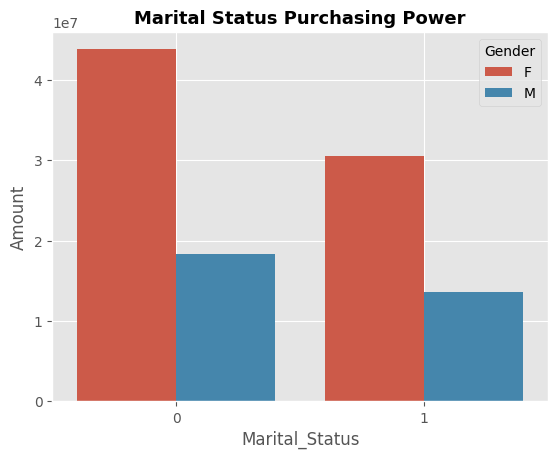

In [23]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

style.use('ggplot')

sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

plt.title('Marital Status Purchasing Power', fontsize= 13, fontweight= 'bold')
plt.grid(True, color='w')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power.*

# **Occupation**

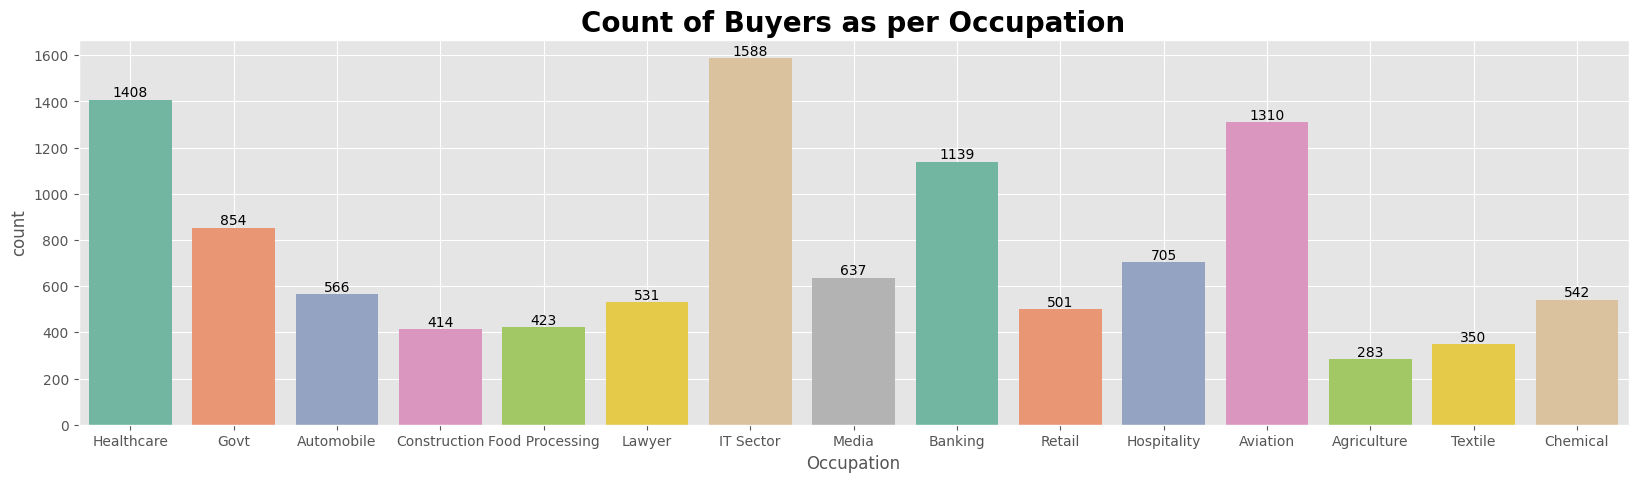

In [ ]:
plt.figure(figsize=(20,5))
style.use('ggplot')
ax = sns.countplot(x= 'Occupation', hue= 'Occupation', palette= 'Set2', data = df)


for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Count of Buyers as per Occupation', fontsize= 20, fontweight= 'bold')
plt.grid(True, color='w')
plt.show()

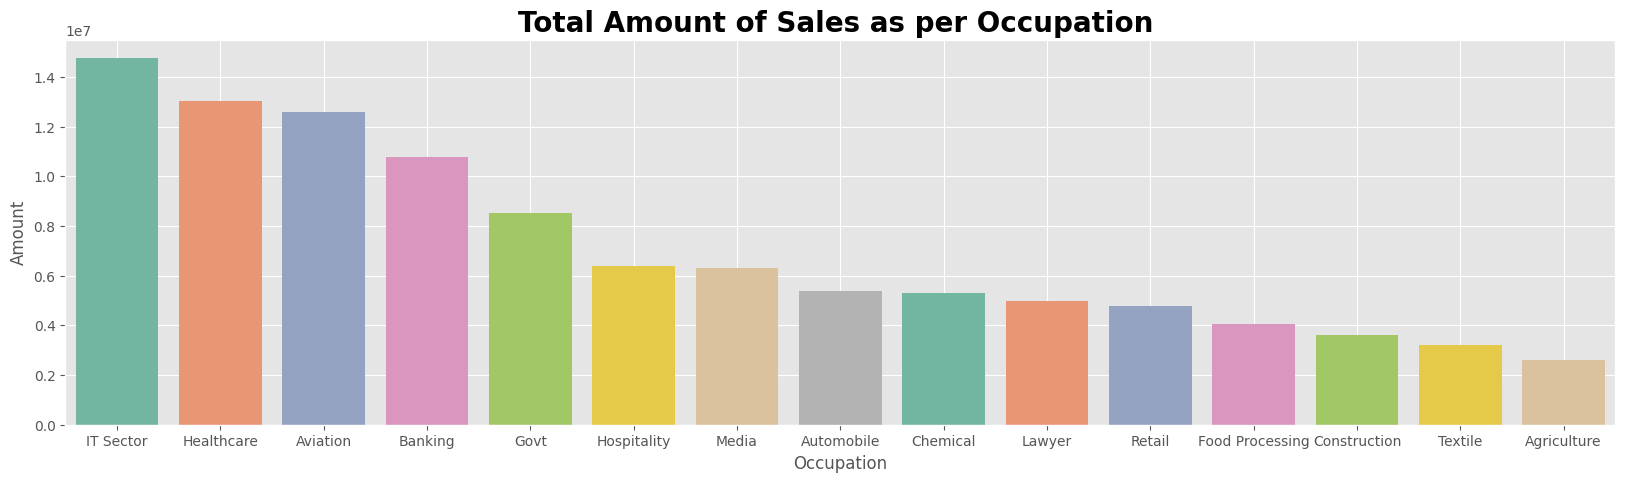

In [ ]:
plt.figure(figsize=(20,5))
style.use('ggplot')
sales_state = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by= 'Amount', ascending= False)
sns.barplot(x= 'Occupation', y= 'Amount', hue= 'Occupation' , palette='Set2', data= sales_state)

plt.title('Total Amount of Sales as per Occupation ', fontsize= 20, fontweight= 'bold')
plt.grid(True, color='w')
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.*

# **Product Category**

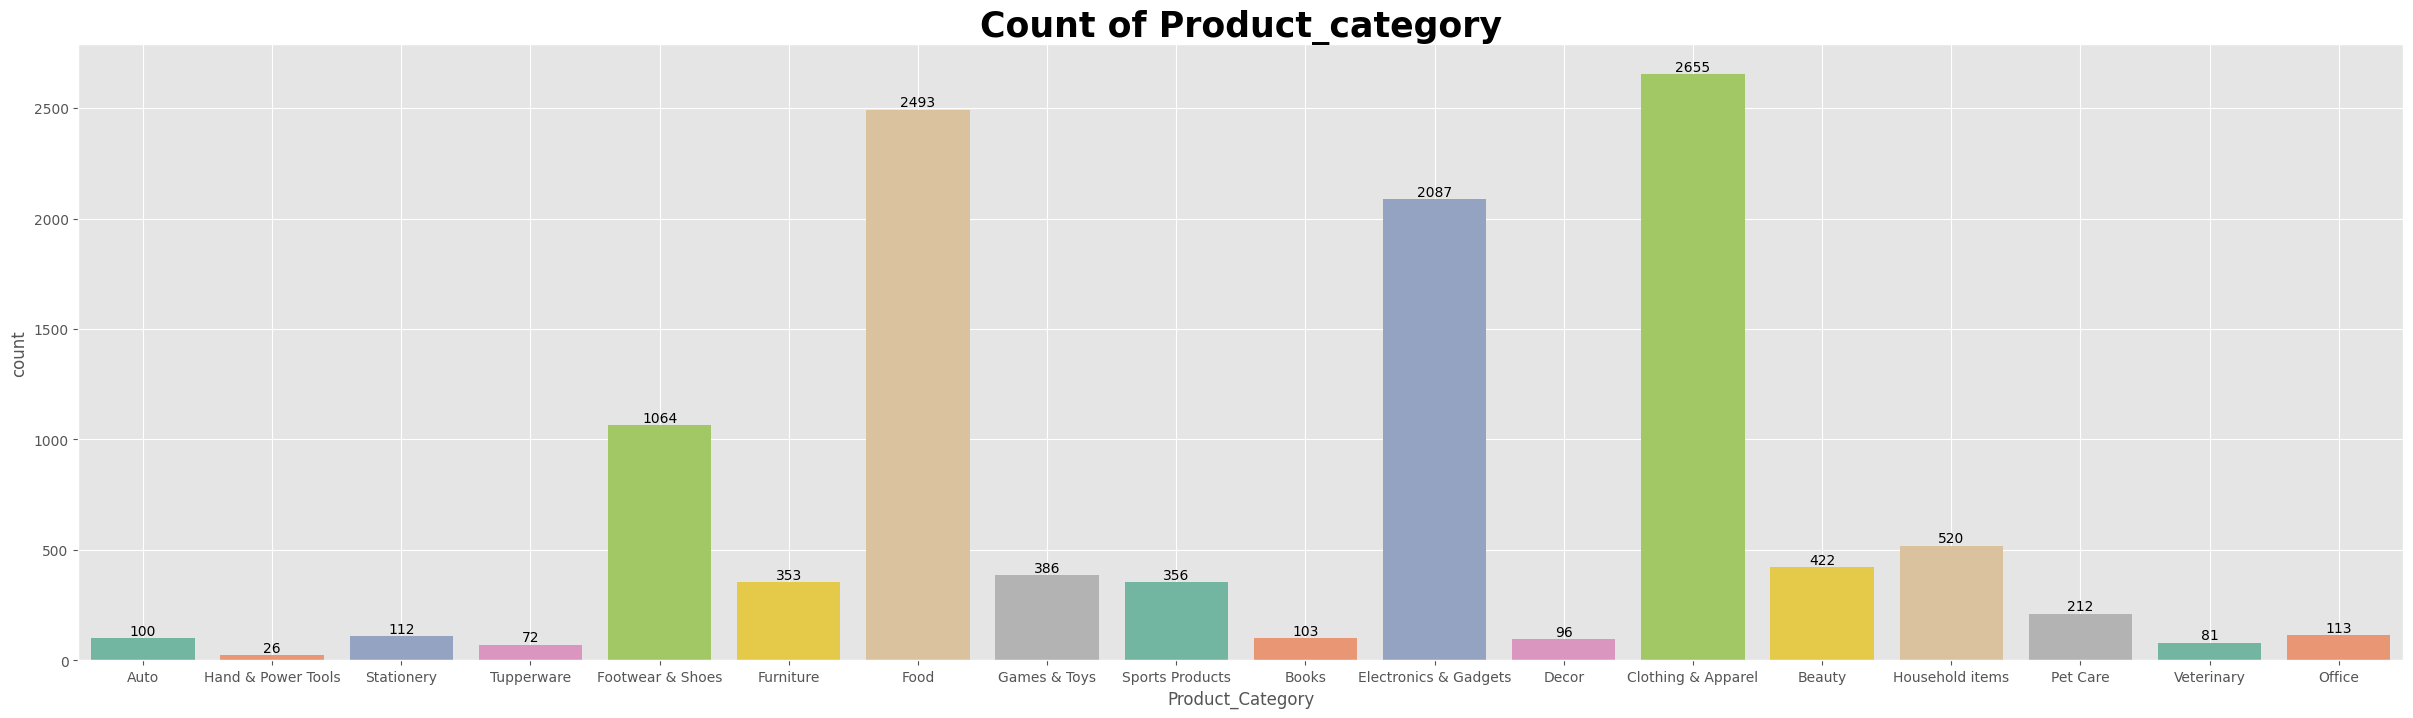

In [ ]:
plt.figure(figsize=(30,8))
style.use('ggplot')
ax = sns.countplot(x = 'Product_Category', hue= 'Product_Category', palette='Set2', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Product_category', fontsize= 25, fontweight= 'bold')
plt.grid(True, color='w')
plt.show()

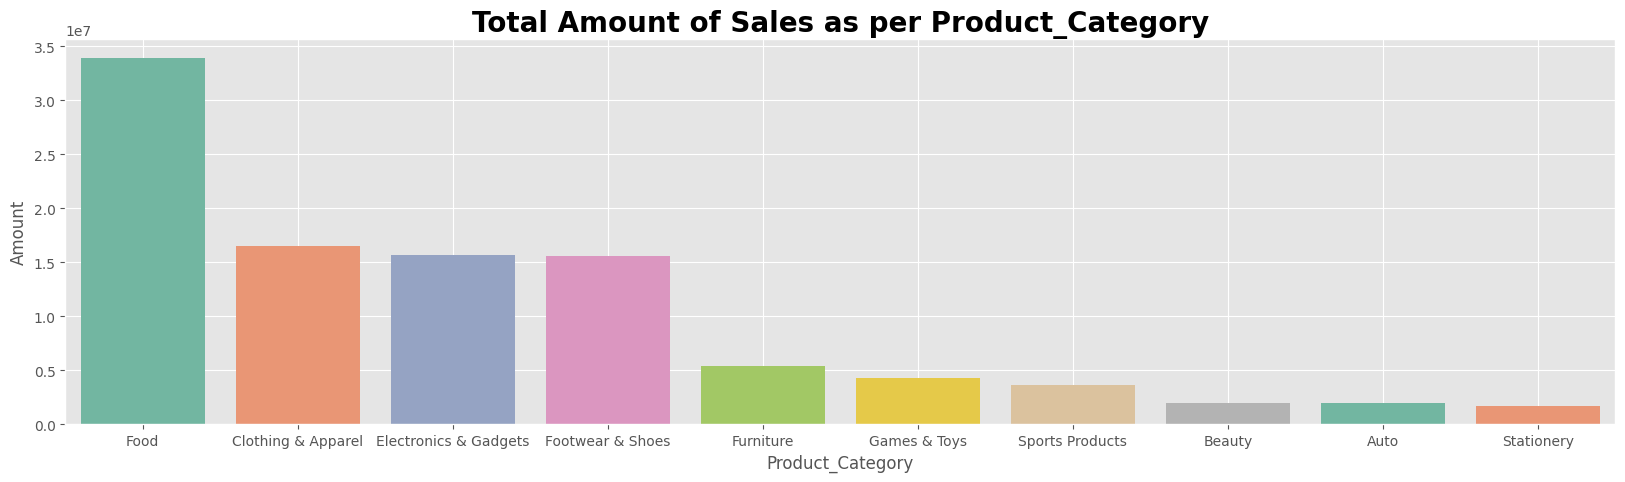

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(20,5))
style.use('ggplot')
sns.barplot(x = 'Product_Category', y= 'Amount', hue= 'Product_Category', data = sales_state, palette='Set2')

plt.title('Total Amount of Sales as per Product_Category', fontsize= 20, fontweight= 'bold')
plt.grid(True, color='w')
plt.show()

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.*

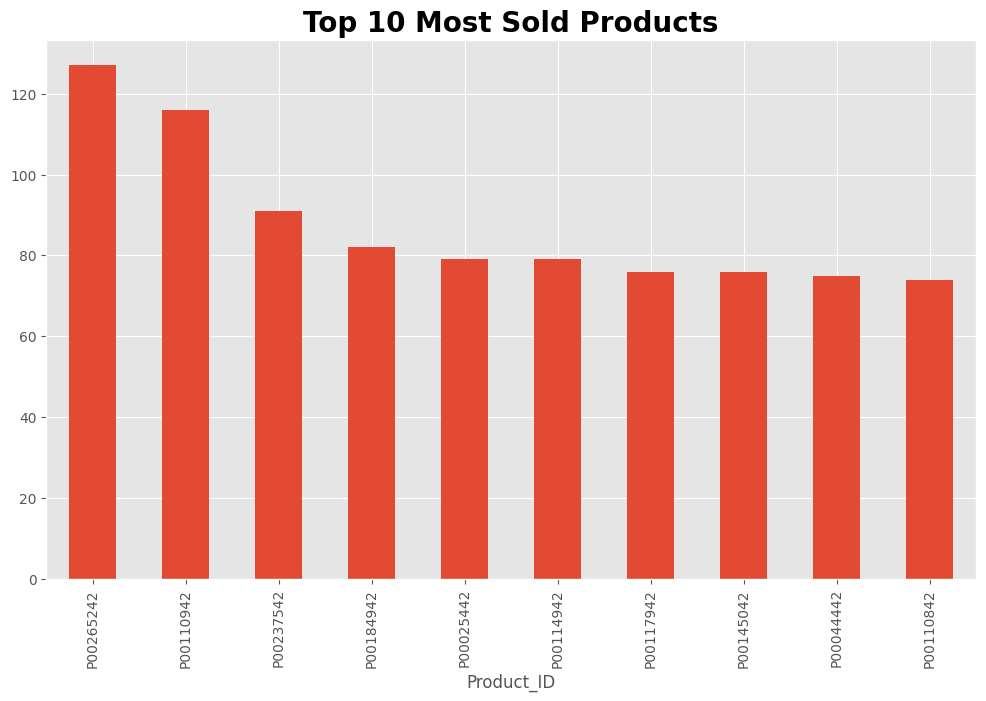

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

plt.title('Top 10 Most Sold Products', fontsize= 20, fontweight= 'bold')
plt.grid(True, color='w')
plt.show()

***Conclusion:***


*   *Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.*


